In [1]:
# Imports and Notebook macros
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

%matplotlib notebook

# Einführung Modelle, Modellbildung und Bewertung

## 1. Was genau ist überhaupt ein gelerntes Modell?

Unsere heutigen Datensätze bieten oft eine Vielzahl an Variablen und Observationen, da es durch digitale Systeme ein leichtes ist, diese zu sammeln und zu speichern. Diese Vielfalt vermag es Abhängigkeiten abzubilden, welche von vereinfachten Formeln (z.B. für Wirtschaft, Physik)nicht mehr erfasst werden (können).  

Statt nun zu versuchen, ein komplexe Formel für diese Daten "von Hand" zu finden, nutzen wir verschiedenste, zum großen Teil statistische Methoden, um ein Modell anhand einer Kenngröße wie der Vorhersagegenauigkeit in einem empirischen Prozess automatisiert anzupassen.   

Beim Machine Learning ist man also mehr an der Genauigkeit der Vorhersage anhand realer (aber begrenzter) Daten interessiert. Das eigentliche Verfahren wird dabei ganz pragmatisch mehr als "Black Box" betrachtet - die Ergebnisse und Konfidenz zählen dabei.

> **Merke:** Die Fachliteratur ist fast aussschliesslich in englischer Sprache, weshalb wir auch hier die englischen Begriffe vorziehen. Teilweise gibt es fuer die entsprechenden Wikipedia Artikel keine deutsche Uebersetzung.

Prinzipiell gibt es verschiedene Ansaetze zu einem Modell zu gelangen. Diese haengen davon ab, welche Daten verfuegbar sind und welche Frage das Modell ueberhaupt beantworten soll.  
Die drei Hauptkategorien sind:  

**Unsupervised-Learning** Dt. etwa "unangewiesenes Lernen". Bei dieser Form macht man dem Modell keine strikten Vorgaben, wie die Ausgabe auszusehen hat. Stattdessen laesst man das Modell die Daten anhand eines Masses (Metrik oder statistisch) eigenstaendig einer Klasse ein- bzu zuteilen. Diese Verfahren werden oft in der fruehen, explorativen Phase verwendet, um abhaengigkeiten der Daten zu erfassen oder Expertenwissen zu unterstuetzen.  Beispiele sind: 
1. Clustering: Einteilen der Daten in 1..N Klassen oder Analyse von bestehenden Einteilungen
2. Novelty- und Anomaly-Detection: Detektion von ungesehenen bzw. anomalen Zustaenden z.B. in der Prozessueberwachung in der Produktion. Es gibt gibt viele "gute" Daten aber wenig/keine "schlechte" -> zumindest grundlegende Unterscheidung kann erreicht werden und im Anschluss von Experten bewertet werden (Steigerung der Effizienz)

**Supervised-Learning** Dt. etwa "Angewiesenes Lernen". Hierbei wird dem Modell anhand von Beispielen vorgegeben, wie die Datenpunkte auf die eine begrenzte Menge der Zielvariable abbilden (einer der haeufigsten Faelle in der Praxis). Oftmals haben Personen, welche mit bestimmten Daten arbeiten, schon ein Grundverstaendnis oder Domaenenwissen.  
Dies kann z.B. 
- eine Klassifizierung von Datenpunkten in Maschinenzustaende
- Einteilung von Produkten oder Kunden in Kategorien
- Abschaetzung von Zeithorizonten z.B. ETA unter oder ueber 4 Stunden

**Reinforcement-Learning** Dt. "Bestaerkendes Lernen". Bei dieser Art gibt es keine feste Zuteilung zu einer Zielvariablen. Stattdessen wird der Erfolg des Modells mit einem externen Kriterium bemessen und im Anschluss ein Feedback eingespeist (Positiv/Negativ/Neutral). Diees Herangehen wird oft verwendet bei sehr komplexen Problemen, wo es nicht mehr moeglich ist, alle Systemzustaende mit einer geringen Anzahl von festen Klassen abzubilden.  
Beispiele sind hier oft in der Automatisierung von Spielen zu finden (Bots), oder auch bei Problemen, die Bewegung von Robotern behandeln. Beide haben gemeinsam, das eine sehr grosse Menge von Moeglichkeiten erkundet wird (Folgen von Spielzuegen oder Bewegungen) und erst zu einem spaeteren Zeitpunkt klar ist, ob das eine gute oder schlechte Auswirkung hatte (z.B. Spieler tot, Roboter Kollision).

Von diesen vorgestellten Teilgebieten hat Supervised-Learning das breiteste Anwendungsgebiet. Daher wollen wir uns in diesem Workshop auch darauf fokussieren.

### 1.1 Formales Modell 
Wie sieht das eben beschriebene Vorgehen also nun formal aus?  

Die Menge unserer aufgezeichneten Daten bezeichnen wir als $X$ (Domain Set).  
Die Menge unserer Zielvariablen bezeichnen wir als $Y$ (Label Set).  
Das Ziel unseres Modells ist es nun, eine Funktion $h$ aus einer Klasse zu finden, welche jedes Sample in $X$ auf das korrekte Label in $Y$ abbildet:  

$$
h: X \to Y
$$

was natuerlich in der Praxis nicht immer eindeutig moeglich ist, weswegen wir einen Fehler in kauf nehmen muessen.  

Allgemein befasst sich Machine Learning in der Theorie mit der Frage, wie eine gute Hypothese $h$ aus einer Klasse ausgewaehlt werden kann, welche Klassen ueberhaupt eine Lernbarkeit ermoeglichen und wie gross die zu maximal zu erwartenden Fehler sind (Dies ist allerdings eher Grundlagenforschung). 

Wir wollen jedoch hier das Grundverstaendnis fuer die Implementierung und Anwendung  solcher Verfahren aufbauen, welche in der Praxis wichtig sind.

### 1.2 Verlustfunktion (Loss Function)

Die Verlust Funktion (auch Kosten- oder Fehlerfunktion genannt) dient dazu, die Vorhersagen unseres Modells mit der uns bekannten Grundwahrheit pro Sample zu vergleichen und in Zahlen ausdrücken.  

Die verlustfunktion $L$ hängt also lediglich von zwei Größen ab:  
Wahrer Wert der Zielvariable: $y$  
Vorhergesagter Wert der Zielvariable $\hat{y}$ ,  welcher gleichbedeutend ist mit unserer Hypothese, angewendet auf ein Sample $\hat{y}=h(x)$

$$
L(\hat{y}, y) = L(h(x), y)
$$

Die einfachste mögliche Funktion ist dabei der sogenannte 0-1-Loss: Wenn der, für die Zielvariable vorhergesagte, Wert nicht den gleichen Wert wie in der Grundwahrheit hat, trägt man für dieses Sample einen Fehlerwert von 1 ein. Wenn die Werte übereinstimmen, trägt man eine 0 ein. Diese Funktion ist besser geeignet für Klassifikation, für eine Regression eher weniger.

$$
L(\hat{y}, y) = \begin{cases} 1 & \mbox{ für }\quad \hat{y} \ne y \\ 0 & \mbox{ für }\quad \hat{y} = y \end{cases}
$$

Verschiedene Klassen von Algorithmen benutzen verschiedene Verlustfunktionen, welche extra darauf angepasst sind. Sie kennen dies vielleicht aus den Mathematik bzw. Statistik Grundlagen, dort werden für eine lineare Regression z.B. die Quadrate der einzelnen Fehler berechnet (least squares method).

Mit einer solchen Fehlerfunktion ist es nun möglich, die Vorhersagekraft unseres Modells für einen Teil des Datensatzes zu bemessen und in einer einfachen, skalaren Zahl auszudrücken.  
Dieses Maß nennt man dann das empirische Risiko des Prediktors.

### 1.2 Minimieren des Empirischen Risikos (Empirical Risk Minimization)

Um alle punktuellen Werte der Fehlerfunktion nun in ein Skalar umzuwandeln, bilden wir das Mittel der Summe aller Werte der Fehlerfunktion angewandt auf einen Teil des Datensatzes, der Training-Menge $S \subset X$.

$$
R_{empirisch}= \frac{1}{N} \sum_{i=1}^N{L(h(x_i), y_i)}
$$

Dies nennt man den empirischen Fehler. 

Den "echten" Fehler können wir gar nicht bestimmen, da die zugrundeliegende, echte Verteilung der Daten nicht als bekannt angenommen werden kann.  
Im einfachsten Fall (0-1 Loss) entspricht das Risiko dann also beispielsweise etwa dem Anteil der Falschaussagen an allen Instanzen. 

Ein guter Lernalgorithmus $A$ ist nun dadurch charakterisiert, dass er genau die Hypothese $\hat{h}$ findet, welche den empirischen Fehler minimiert. Die Hypothese $\hat{h}$ ist hierbei charakterisiert durch eine bestimmte Menge von Parametern einer Klasse von Funktionen (welche durch die Wahl des konkreten Lernalgorithmus eingeschränkt wird).   

$$
\hat{h} = \arg \min_{h \in \mathcal{H}} R_{\text{empirisch}}(h)
$$
 

> **Merke:** Fuer viele Modelle ist dies oft ein konvexes bzw. approximativ konvexes Problem und somit mit bekannten Verfahren (Solver) lösbar - dies erledigen dann die Bibliotheken für uns.  
Der 0-1-Loss wird in der Praxis nicht verwendet (nicht konvex, nicht ableitbar).  
ERM ist bei Neuralen Netzen so nicht anwendbar, (da nicht konvex/eindeutig) aber die Grundidee bleibt die selbe.

### 1.3 Generalisierungsfehler (Generalization Error)
Wie bereits angesprochen, kennen wir die zugrundeliegende Verteilung unserer Daten nicht. Das fuehrt dazu, dass wir den Fehler des Modells auf ungesehenen Daten nicht genau bestimmten koennen.  

Die Theorie garantiert grobe Ober- / Untergrenzen fuer diesen Fehler, welche auf bestimmten, teilweise recht strikten, Annahmen basieren. Ferner ist bekannt, dass es keinen universellen Lernalgorithmus geben kann. Da Daten sich in der echten Welt eben oft nicht so gutmuetig verhalten wie in der Theorie, sind uns hier gewisse Grenzen gesetzt.

Was uns uebrig bleibt, ist eine Schaetzung des Generalisierungsfehlers ueber ein statistisches Validierungsverfahren auf unseren vorhandenen Daten. Die richtige Durchfuehrung ist absolut essentiell fuer eine maximale Performanz des Modells!

> **Merke:** Es gibt keinen universell besten Lernalgorithmus!

### 1.3 Messen der Prädiktionsleistung

Um die Generalisierungsleistung (bzw. den Fehler) unseres Modells abzuschaetzen, muessen wir mehrere Experimente auf Teilmengen unseres Datensatzes durchfuehren. Es kann naemlich sein, dass ein bestimmter Auszug aus unseren Daten das Modell negativ beeinflusst. Das passiert im Grunde auf zwei Arten:  

1. **Underfitting** Das Modell ist "zu schlecht" angepasst. Dies Merken wir sehr schnell dadurch, dass die gelieferten Vorhersagen eine schlechte Genauigkeit zeigen. Unser Modell liegt also die meiste Zeit falsch.  Der Generalisierungsfehler und der empirische Fehler sind beide *hoch*
2. **Overfitting** Dieser Fall ist weitaus schwieriger zu unterscheiden, da das Modell hier sehr gute Ergebnisse liefert, was ebenfalls unser Ziel ist. Die Gefahr hierbei ist aber, dass die Entscheidungsgrenze zu sehr an ein nicht-repraesentative Teilmenge unserer Daten angepasst wurde, was zu *schlechteren* Ergebnissen mit anderen Daten, welche nicht Teil der Trainigsmenge sind, fuehrt. Der empirische Fehler ist sehr *klein*, aber der Generalisierungsfehler ist *gross*.

In [2]:
Image(url= "https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png")

In der Praxis kann man diese Entscheiungsgrenzen aber meistens gar nicht visualisieren, da wir uns in hoeheren Dimensionen bewegen. Wir brauchen also einen Weg, wie wir die Vorhersagen unseres Modells bewerten koennen.  

Fuer einen Binaeren Klassifikationsalgorithmus, dessen Ausgabe nur einer von zwei Klassen sein kann, haben wir eine schlechte Leistung, wenn die Genauigkeit 50% betraegt - der Algorithmus ist in diesem Fall nicht besser als Raten!  
Wenn ein Algorithmus schlechter als 50% Genauigkeit ist, koennen wir die Interpretation der Label einfach umdrehen und erhalten so eine Genauigkeit groesser als 50% (welche Klasse das Label '0' oder das Label '1' bekommt ist voellig egal)

Die Genauigkeit ist definiert als: 

$$
Genauigkeit = \frac{Korrekt \quad vorhergesagte \quad Anzahl}{Gesamtanzahl \quad der \quad Vorhersagen}
$$

> **Merke:** Es gibt noch weitere Moeglichkeiten, die Performanz eines Modells zu bemessen, welche besser geeignet sind, wenn es eine z.B. grosse Klassenimbalance gibt [Phi Coefficient Explainer](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient#Advantages_of_MCC_over_accuracy_and_F1_score)

**Confusion Matrix** 
Die Confusion-Matrix, auch Prediction-Matrix genannt, liefert uns eine Uebersicht ueber den Anteil von wahren und falschen Aussagen. Dabei gibt es prinzipiell vier verschiedene Moeglichkeiten:

1. True Positive sind positiv vorhergesagte Ergebnisse (i.e. Label '1'), welche in der Grundwahrheit ebenfalls das positive Label '1' aufweisen. 
2. False Positive sind positiv vorhergesagte Ergebnisse (i.e. Label '1'), welche in der Grundwahrheit aber das negative Label '0' aufweisen
3. True Negative sind negativ vorhergesagte Ergebnisse (i.e. Label '0'), welche in der Grundwahrheit ebenfalls das negative Label '0' aufweisen.
4. False Negative sind negativ vorhergesagte Ergebnisse (i.e. Label '0') welche in der Grundwahrheit aber das positive Label '1' aufweisen.  

Damit koennen wir auch die Genaugkeit in Abhaengigkeit dieser Werte Ausdruecken:

$$
Genauigkeit = \frac{TP+TN}{TP+FP+TN+FN}
$$

Diese Moeglichkeiten werden einfach in einer quadratischen Matrix mit dimension N eingetragen (im binaeren Fall also 2x2). Dies kann in absoluten Zahlen oder normiert geschehen, am einfachsten zu lesen ist jedoch der Prozentwert.

![confusion_matrix_binary.png](../resources/images/confusion_matrix_binary.png)

Grundsaetzlich ist hier zwischen verschiedenen guten Modellen immer ein Trade-Off in den spezifischen Fehlerraten.  Fuer verschiedene Anwendungen koennen die verschiedenen Moeglichkeiten eine unterschiedlich starke Bedeutung haben.  

In der Medizin zum Beispiel werden vermehrte False Positives als weniger schlimm angesehen, sofern man dafuer eine hohe Genauigkeit bei den True Positives/True Negatives zusammen mit wenigen False Negatives bekommt. Es waere ziemlich verheerend, Krebs im fortgeschrittenen Stadium zu uebersehen.  

In anderen Bereichen, etwa bei automatisierten Warnsystemen mit hochfrequenten Messungen, koennen uebermaessige False Positives jedoch stoerend sein. Besonders wenn das System dazu genutzt wird, die Datenmengen zu reduzieren, welche ein Mensch danach manuell inspizieren soll ("Alert-Fatigue" Dt. Alarm-Erschoepfung). 

### 1.4 Training - Ein Modell anlernen 
Fuer die Trainingsphase teilen wir unseren Datensatz idealerweise in drei Teile, um in einem spaeteren Schritt eine moeglichst gute Annaeherung des Generalisierungsfehlers erzeugen zu koennen. Diese drei Teile sind:  

**Training Set**  
Der Trainingsdatensatz dient als Eingabe des Lernalgorithmus, auf welchen dieser die Entscheidungsfunktion anpasst. Dadurch sind per Definition bessere Vorhersagen fuer Daten aus diesem Satz moeglich, und sollten also mit Vorsicht betrachtet werden. Er ist typischerweise der ein grosser Anteil an unserem gesamten Datensatz (ungefaehr zw. 1/3 und 3/4). 

**Validation Set**  
Der Validierungsdatensatz wird dem Modell beim Training vorenthalten und wird lediglich genutzt, um die Performanz des bereits trainierten Modells zu bemessen. Mit diesem Ergebnis kann man dann die Hyperparameter des Modells anpassen. Zum Beispiel die C-konstante einer Support-Vector-Machine oder die Layer eines Neural-Network (dazu spaeter mehr).  
Der Anteil des Validitation-Set bewegt sich typischerweise zwischen 10% und 20%.

**Test Set**
Der Testsatz wird dem Modell ebenfalls beim Training vorenthalten, zusaetzlich aber auch bei der Auswertung des Einflusses der Hyperparameter. Das heisst, es wird erst ganz am Ende benutzt um die die Genauigkeit eines bereits fertig trainierten und angepassten Modells zu bemessen. Auch hier betraegt der Anteil etwa zwischen 10% und 20%. 


Allen Teilsaetzen ist gemein, dass sie eine moeglichste gute Represaentation des gesamten Datensatzes darstellen sollen. Dies wird dann schwierig, wenn fuer bestimmte Klassen nur eine geringe Anzahl an Datenpunkten zur Verfuegung steht. In diesem Fall kann das Validation-Set weggelassen werden um mehr Datenpunkte fuer Trainig/Testing zur Verfuegung zu haben. Allerdings muss dann ebenfalls die Auswertung mittels randomisierten Train und Test-Sets ueber mehrere Durchlaeufe erfolgen, damit die Konfidenz des Modells ermittelt werden kann.

An dieser Stelle schauen wir uns einmal den Workflow mit der library sklearn an. Dieser folgt immer dem gleichen Schema:  
1. Laden/Bereinigen/Transformieren der Daten
2. Aufteilen in Train/Test/Validation Sets
3. Anpassen des Modells auf die Daten mit der .fit() Methode
4. Auswerten der Performanz des Modells bzw. des Durchlaufs (dazu spaeter mehr)

Andere High-Level Bibliotheken folgen ebenfalls einem aehnlichen Konzept. Spezielle Bibliotheken fuer Neuronale Netze funktionieren ein wenig anders.

Accuracy: 0.867704280155642
Phi Coefficient 0.713905064457953


<IPython.core.display.Javascript object>


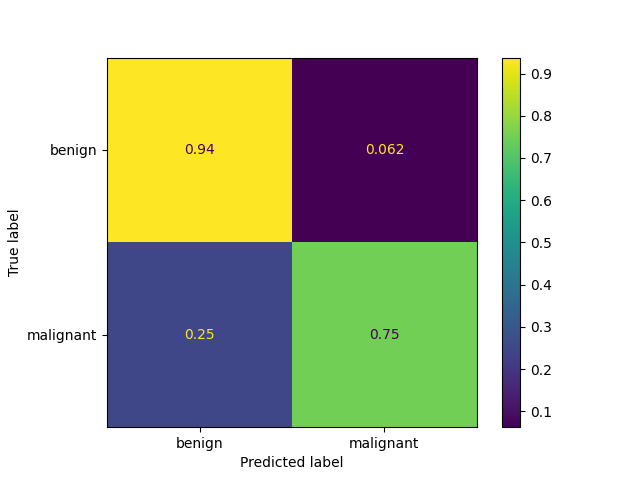

In [4]:
# MWE sklearn 
# test/train/validate + classifier auf breast_cancer.csv
# zum zeigen der generellen API
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, plot_confusion_matrix


df = pd.read_csv('../resources/data/breast_cancer.csv', sep=';')

#choose 2 features we remember from the correlation plot last chapter
features = ['mean radius', 'mean texture']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['diagnosis'], train_size=0.55, stratify=df['diagnosis'])

clf = LogisticRegression(penalty='l2').fit(X_train, y_train)

y_pred=clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Phi Coefficient", matthews_corrcoef(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, normalize='true')  
plt.show()

> **Merke** Ein Modell muss immer ueber ein statistisches Verfahren validiert werden, einzelne Ergebnisse sind *nicht* schluessig!

### 1.5 Kreuzvalidierungsverfahren (Cross Validation)

Es gibt allerdings nicht nur Unsicherheit bei der zufaelligen Wahl der Samples, welche das Modell beeinflussen und eine Validierung erfordern. Alle ML-Algorithmen haben bestimmte Parameter, mit denen das Verhalten eingestellt werden kann. Leider laesst sich nicht vorhersagen, welche Parameter das beste Ergebnis erzielen. Daher muss ein statistisches Validierungsverfahren angewendet werden, das Kreuzvalidierungsverfahren.  
Es gibt jedoch mehrere Auspraegungen einer Cross-Validation: 
1. **Exhaustive** hierbei werden alle moeglichen Train/Validation-Splits getestet. Bereits fuer mäßig grosse Datensaetze steigt der Rechenaufwand jedoch so stark, dass diese Variante fuer die meisten ML-Probleme nicht praktikabel ist (z.B Leave-P-Out Cross-Validation).
2. **Non-Exhaustive** hierbei wird nur ein Teil der moeglichen Train/Validation-Splits getestet. Ziel ist es, die Aussagekraft der Leave-P-Out Cross-Validation bei geringerem Rechenaufwand zu approximieren. 

    - **k-fold Cross-Validation** Bei diesem Verfahren wird eder Datensatz in k gleichgrosse Teile aufgeteilt. Anschliessend wird das Modell mit k-1 dieser Teile trainiert und mit einem Teil validiert. Dieser Prozess wird dann insgesamt k-mal wiederholt, bis jede Teilmenge ein mal zur Validierung verwendet wurde (und folglich auch mehrmals zum trainieren). Das Ergebnis kann dann ueber alle Durchlaeufe gemittelt werden.  Der Vorteil hierbei ist, dass sichergestellt ist, dass jeder Datenpunkt zum trainieren und auch zum testen verwendet wurde.  Typischerweise wird der Split "stratified", d.h. dass in jeder Teilmenge unegfaehr die gleiche Verteilung der Zielvariable hat. Fuer $k = n_{samples}$ ist es aequivalent zu Leave-One-Out.
    - **Holdout-Methode**  Hierbei wird ein Teil der Daten sowohl bei Training als auch beim Testen vorenthalten, ist also fuer das Modell komplett "ungesehen" bzw. neu. Die Datenpunkte werden typischerweise zufaellig ausgewaehlt, wobei das Trainings-Set groesser ist, als das testing Set ( ca. 50/50 bis 80/20). Dieses Verfahren ist sehr schnell, durch die Zufaelligkeit kann aber kein konkreter Rueckschluss aus einem einzigen Lauf gezogen werden. Wenn dieses Verfahren ueber mehrere Laeufe Angewandt wird, nennt man es 
    - **Repeated-Random-Sub-Sampling** Hierbei wird effektiv die Holdout-Methode mehrfach angewandt, um die Modellperformanz statistisch auszuwerten. Der Vorteil gegenueber k-fold ist, dass das Verhaeltnis der Anzahl von Training/Test-Samples immer gleich bleibt. Der Nachteil ist, dass manche Samples mitunter nicht zum Testen verwendet werden oder gar mehrmals (zufaellig). Je hoeher die Anzahl der Durchlaeufe, desto besser die Annaehrung an Leave-P-Out.


Wir muessen also jeweils die Wahl der Samples und die Wahl der Parameter validieren. Dies macht es erforderlich, die eben beschriebenen Methoden verschachtelt und kombiniert anzuwenden. Dabei kann unterschiedliche Kombinationen anwenden, das haeufigste jedoch ist eine Erweiterung der k-Fold Variante mit einer inneren und einer aeusseren Validierungsschleife.  
Dies ist in sklearn ebenfalls moeglich mittels [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) (fuer die parameter) und [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) fuer die Fehlerapproximation.  

Fuer praktische Anwendungsbeispiele siehe [Kreuzvalidierung in sklearn](https://scikit-learn.org/stable/modules/cross_validation.html) und [Verschachtelte Kreuzvalidierung in sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

> **Merke:** Um schluessige Ergebnisse zu erzielen, muss ein Modell immer ueber ein statistisches Verfahren validiert werden. Jede Unbekannte (Samples, Parameter) erfordert je einen eigenen Validierungsschritt.

## 2. Lineare Prädiktoren (Linear Predictors)

### 2.1 Logistische Regression

Die logistische Regression ist eine Erweiterung der Linearen Regression fuer Klassifizierungsprobleme und wird genutzt, um die Wahrscheinlichkeit einer abhaengigen Variable mit zwei moeglichen Zustaenden zu modellieren. Sie kann also zusammen mit einer Threshold-Funktion auch zur Klassifikation eingesetzt werden. Die Idee dabei ist, ein unendliches Eingabeintervall auf ein fixes Intervall $[0,1]$ abzubilden und dies als Wahrscheinlichkeit interpretieren. Damit man dies tun kann, wird die die logistische Funktion (manchmal auch Expit genannt) verwendet

$$
F_{logistisch}(x) = \frac{1}{1+e^{-x}}
$$

welches genau die Umkehrfunktion des Logarithmus der Autrittswahrscheinlichkeiten (Logit) ist (die Namensgebung ist hier historisch gewachsen und etwas irrefuehrend). Diese Funktion ist eine Sigmoidfunktion (eine S-foermige Kurve) - dies koennen wir mit Python direkt verifizieren:

<IPython.core.display.Javascript object>


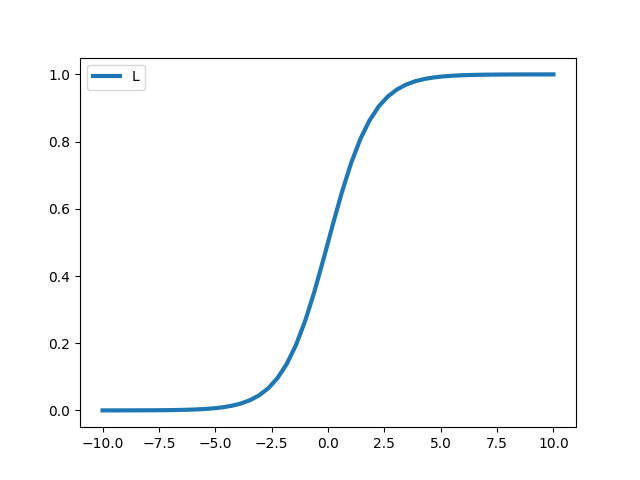

In [5]:
from math import exp
import numpy as np

def logistic(x): 
    return 1 / (1+exp(-x))

x = np.linspace(-10, 10)
y = [logistic(elem) for elem in x]

plt.figure()
plt.plot(x, y, linewidth=3)
plt.legend('Logistic Function')
plt.show()

Die logistische Regression nimmt nun einen linearen Zusammenhang zwischen dem logarithmus der Auftrittswahrscheinlichkeiten $l$ fuer $Y=1$ und den Modellvariablen $\beta_i$ an (letztere muessen gefunden werden).  

$p$ ist die Wahrscheinlichkeit $Y=1$, $x_i$ sind die Eingangsvariablen (Features).

$$
l = \ln \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

Die rechte Seite dieser Gleichung kommt aus der [linearen Regression](https://en.wikipedia.org/wiki/Linear_regression).

Durch Aufloesen der Gleichung nach der Wahrscheinlichkeit erhaelt man exakt die logistische Funktion, nun in abhaengigkeit der Modellvariablen (Exponent im Nenner).

$$
\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}} = F_{logistisch}(\beta_0 + \beta_1 x_1 + \beta_2 x_2)
$$

Mehr zu den ausgelassenen Schritten [hier](https://en.wikipedia.org/wiki/Logistic_regression#Logistic_model).

Diese Methode Funktioniert ebenso mit mehreren Eingangsvariablen - mit zwei Eingangsvariablen wird die logistische Funktion zur einer "Welle". In noch hoeheren Dimensionen wird es dann schwer sich das vorzustellen. 

*Wieso ist dieser Classifier nun linear?*  
Schlussendlich wird zur Klassifizierung eine Threshold-Funktion angewendet, um ein konkretes Ergebnis zu erlangen. Zum Beispiel kann als Schwellwert 0.5 gewaehlt werden, sodass 


\begin{align}
  f_{th}(x) = 
  \begin{cases}
    1,& \text{if } x > 0.5\\
    0,& \text{if } x \le 0.5
  \end{cases}
\end{align}

Dies manifestiert sich dann als lineare Grenze im Feature-Space entlang des Nulluebergangs der logsitischen Funktion, welcher linear ist.




### 2.2 Support Vector Machine

Die Support-Vector-Machine (SVM) ist ein Lernalgorithmus der fuer Klassifikations- und Regressionsaufgaben eingesetzt werden kann. Der Ausdruck "Support Vector Machine" kommt daher, dass dieser Algorithmus einen kleinen Teil der vorhandenen Datenpunkte als Stuetzstellen fuer die Entscheidungsgrenze auswaehlt. 
In der Standardformulierung fuer linear separierbare Daten ist die Entscheidungsgrenze hierbei eine einfache Hyperebene. Die Stuetzstellen fuer diese Hyperebene werden durch den Algorithmus so gewaehlt, dass sie den maximalen Abstand zu den naechsten Punkten auf *beiden* Seiten hat. Diese Stuetzstellen sind das Lernziel des Algorithmus. Diese Ausfuehrung wird auch Hard-Margin-SVM genannt.

Fuer den einfachen zweidimensionalen Fall (2 Features) $\vec{x} \in \mathbb{R}^2$ ist dieses Prinzip in der folgenden Abbildung grafisch dargestellt. Hiebei ist $w$ der Gewichtsvektor, $x = (x_1, x_2)$ sind die Samples und $b$ ist der sogenannte Bias-Term (ein fixes Offset). Die Distanz zwischen den Stuetzstellen und der Hyperebene ist $\frac{2}{\Vert \mathbf{w} \Vert}$. Um diese zu maximieren, muss $\Vert \mathbf{w} \Vert$ minimiert werden.  
Das bedeutet, dass der Gewichtsvektor $w$ und der Bias-Term $b$ die Parameter sind, welche der Algorithmus lernen muss. 

![Entscheidungsgrenze einer SVM](../resources/images/svm-decision-hard-margin.jpg "Entscheidungsgrenze einer SVM")

In dieser urspruenglichen Form ist die SVM ein linearer Klassifizierungsalgorithmus, welche die Entscheidung aufgrund einer Linearkombination von Datenpunkt und Gewichtsvektor errechnen. 
Um eine Vorhersage zu berechnen, wird das Skalarprodukt des Datenpunktes und des Gewichtsvektors berechnet und anschliessend durch eine funktion $f$ auf das endgueltige Ergebnis abgebildet:

\begin{align}
  \hat{y} = f(\vec{w}\cdot\vec{x} + b) = f\left(\sum_j w_j x_j + b \right)
\end{align}


wobei $f$ normalerweise die Signum Funktion (Vorzeichenfunktion) $sgn(\cdot)$ ist, welche angibt, auf welcher Seite der Entscheidungsgrenze der zu klassifizierene Punkt liegt.

Diese Formel ist prinzipiell gleich dem Perceptron, der Unterschied liegt mehr in der Trainingsprozedur. Die SVM versucht den Abstand der Hyperebene zu maximieren, ein Perceptron gibt diese Garantie nicht (es wird irgendeine Hyperebene gelernt, welche die Trennung vollzieht). Im Bild oben sieht man, wie die Hyperebene einer SVM von $\frac{b}{\vec{w}}$ abhaengt. Durch diesen Trainingschritt ist die SVM allerdings nicht aktualisierbar mit neuen Punkten, ein Perceptron hingegen schon (dieser Vorteil bleibt auch bei Neuronalen Netzen bestehen).


**Soft-Margin-SVM**  
Hard-Margin Varianten der SVM funktionieren allerdings nur, wenn die Daten linear separaierbar sind, was in der Praxis fast nie gegeben ist.  
Wenn eine klassifizierung von nicht-separierbaren Daten gewuenscht ist, muss der Grundalgorithmus abgewandelt werden.  
Im Grunde wird dem Algorithmus erlaubt, eine bestimmte Anzahl von Fehlern (Punkte auf der falschen Seite der Entscheidungsgrenze) in Kauf zu nehmen; die Grenze wird "weich". Konkret wird dies durch die Einfuehrung einer neuen Verlustfunktion erreicht. Diese neue Verlustfunktion ist der sog. Hinge-Loss:


\begin{align}
  H = \max\left(0, 1-y_i(\vec{w}\cdot\vec{x}_i - b)\right).
\end{align}
wobei $y_i \in \{-1, 1\}$ das gewuenschte Label von $\vec{x}_i$ ist.


Sie entspricht genau Null, wenn die Hard-Margin Bedinungen erfuellt sind, also der Punkt ist auf der richtigen Seite liegt. 
Andernfalls, wenn der Punkt auf der falschen Seite der Entscheidungsgrenze liegt, gibt sie die Entfernung des Punkts zu der Entscheidungsgrenze an.  
Hiermit wird die Fehlerfunktion, welche beim Trainieren minimiert wird, zu

\begin{align}
  \left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\vec{w}\cdot \vec{x}_i - b)\right) \right] + \lambda\lVert \vec{w} \rVert^2
\end{align}

wobei $\lambda$ ein freier Parameter ist, welcher bestimmt wie gross die Zunahme des Abstand zur Grenze gewertet wird. Anders gesagt: wie stark falsche Praediktionen gewertet werden.  

Fuer komplexere Probleme gibt es ebenfalls eine nicht-lineare Variante, die sogenannte Kernel-SVM.

### 2.3 Perceptron

Wie die anderen Modelle in diesem Kapitel auch, ist das Perceptron ist ein mathematisches Modell um Eingangsvektoren einer Klasse zuzuweisen. Der Perceptron Algorithmus ist bereits sehr alt (Rosenblatt, 1957) und war urspruenglich als Maschine  (nicht als Software) zur Bilderkennung geplant.  

Ein einfaches (Single-Layer / eine Lage/Schicht) Perceptron kann nur lineare Entscheidungsgrenzen erlernen. Allerdings stellt es den Grundbaustein fuer Neuronale Netze dar und kann dementsprechend eine gute Stuetze zu deren Verstaendnis sein. Typischerweise wendet man heutzutage Perceptrons in ihrer urspruenglichen Form eher selten bis gar nicht an.  

Ein Perceptron hat mehrere, *gewichtete* Eingaenge und einen Ausgang, dem eine Schwellwertfunktion nachgeschaltet ist. Der index $j$ im Bild ist nur relevant fuer ein mehrlagiges Perceptron.


![Single Layer Perceptron](https://upload.wikimedia.org/wikipedia/commons/f/ff/Rosenblattperceptron.png)


Mathematisch ergibt sich daraus folgende Funktion:

$$
o(x) = f(\sum_{i=1}^m w_i x_i)
$$

Mit der  Schwellwertfunktion
$$
\varphi (\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > \theta,\\0 & \text{otherwise}\end{cases}
$$

Das einfache Perceptron beschreibt also, wie die SVM, eine Hyperebene im Datenraum. Der Unterschied hier ist, dass das Perceptron keine Garantie fuer die Hyperebene geben kann. Es wird einfach eine der Loesungen welche den Fehler minimieren, verwendet. Bei der SVM gibt es nur genau eine Loesung, welche den Abstand zwischen Entscheidungsgrenze und Punkten maximiert.

Mit neuronalen Netzen (aufgebaut aus einzelnen Perceptrons) koennen dann auch nicht-lineare Probleme gelernt werden. Dazu werden wir in einem spaeteren Kapitel mehr lernen.